#K-means Clustering   
It is an iterative algorithm.   
* n training examples with m features
* Number of centroids: k.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

cluster_count = 3

In [ ]:
?make_blobs

In [ ]:
X, y, centers = make_blobs(n_samples=100, n_features=2, centers=cluster_count, return_centers=True)
print(X.shape, y.shape)
print(centers)

(100, 2) (100,)
[[-0.61080892  3.88124921]
 [-4.43573361 -6.62981104]
 [-4.89838128  8.22425048]]


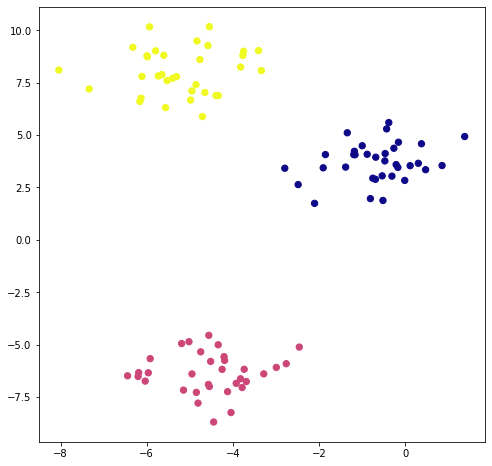

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], c=y, s=40, zorder=2, cmap='plasma')

##K-means Clustering algorithm:   
1. Randomly initialize k centeroids. Each centroid is a vector in m-dimentional space.   
2. Repeat until convergence:
  * assign points to the closest centriod
  * calculate the centriod based on the points assigned to the cluster.

In [ ]:
def fit(X, k):
  centroids = X[np.random.randint(0, X.shape[0], size=k)]

  labels = np.argmin(cdist(X, centroids), axis=1)

  for _iteration in range(10):
    previous_labels = labels.copy()
    centroids = np.array([np.mean(X[labels==r], axis=0) for r in range(k)])
    labels = np.argmin(cdist(X, centroids), axis=1)

    if(all(labels == previous_labels)):
      break
    
  return centroids, labels

In [ ]:
centroids, labels = fit(X, cluster_count)
print(centroids)

[[-0.66420365  3.70101962]
 [-5.21990509  8.02361251]
 [-4.53585145 -6.35170999]]


In [ ]:
def plot_kmeans(X, centroids, labels, rseed=0, ax=None):
  ax = ax or plt.gca()
  #ax.axis('equal')
  ax.scatter(X[:,0], X[:,1], c=labels, s=40, cmap='plasma', zorder=2)
  radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centroids)]
  for c, r in zip(centroids, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=5, alpha=0.5, zorder=1))

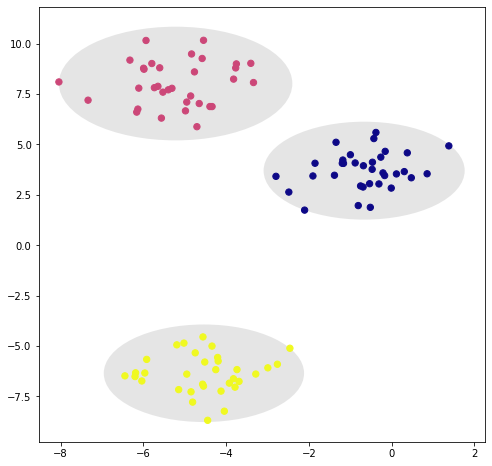

In [ ]:
plt.figure(figsize=(8,8))
plot_kmeans(X, centroids, labels)

###Implement elbow method for finding optimal k

###Implement Silhoutte for finding optimal k